In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

iris = load_iris()
df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)
df.columns = [c.replace(' (cm)', '').replace(' ', '_') for c in df.columns]
df['target'] = df['target'].astype(int)
df['species'] = pd.Categorical.from_codes(df['target'], iris.target_names)

# Task 1: Select features and categories for training
# - Select only versicolor and virginica (classes 1 and 2)
# - Select only sepal_length and petal_length

df_binary = df[df['species'].isin(['versicolor', 'virginica'])].copy()
df_binary['target'] = df_binary['target'] - 1  # Convert to 0 and 1
features = ['sepal_length', 'petal_length']


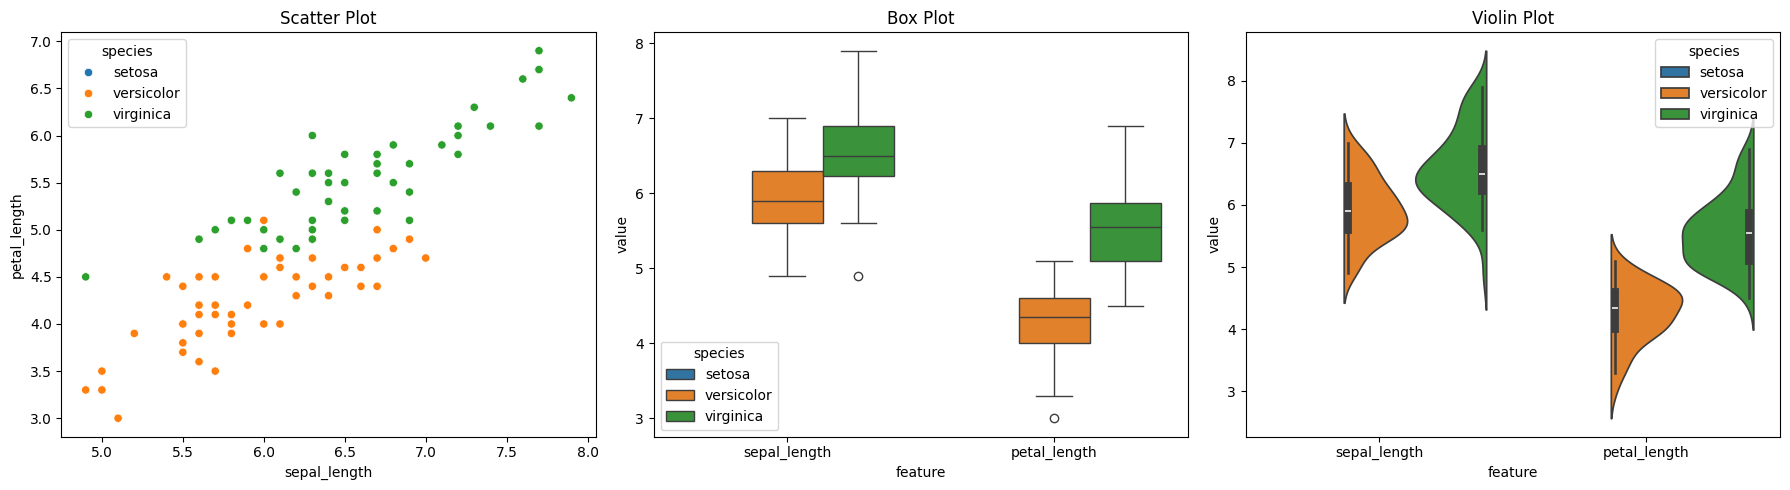

In [3]:
# Task 2: Data Analysis
def plot_data_analysis(df_subset, features):
    """Create scatter plot, boxplot, and violinplot for the dataset"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Scatter plot
    sns.scatterplot(
        x=features[0], y=features[1], 
        hue='species', 
        data=df_subset,
        ax=axes[0]
    )
    axes[0].set_title('Scatter Plot')
    
    # Boxplot
    df_melted = pd.melt(
        df_subset, 
        id_vars=['species'], 
        value_vars=features, 
        var_name='feature', 
        value_name='value'
    )
    sns.boxplot(
        x='feature', y='value', 
        hue='species', 
        data=df_melted,
        ax=axes[1]
    )
    axes[1].set_title('Box Plot')
    
    # Violinplot
    sns.violinplot(
        x='feature', y='value', 
        hue='species', 
        data=df_melted,
        split=True,
        ax=axes[2]
    )
    axes[2].set_title('Violin Plot')
    
    plt.tight_layout()
    plt.show()

plot_data_analysis(df_binary, features)

In [4]:
# Task 3: Split training data and validation data
X = df_binary[features].values  # Convert to NumPy array
y = df_binary['target'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [5]:
# Task 4: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the decision region function as provided in the document
def decision_region(X, y, model, step=0.01, title='Decision Region', 
                    xlabel='Feature 1', ylabel='Feature 2', 
                    target_names=['versicolor', 'virginica']):
    """
    Draw decision region for a binary classification model with 2D features.
    
    Parameters
    ----------
    X : ndarray, shape(n_samples, 2)
        Features
    y : ndarray, shape(n_samples,)
        Labels
    model : object
        Trained model instance
    step : float, (default : 0.01)
        Step size for calculating prediction grid
    title : str
        Graph title
    xlabel, ylabel : str
        Axis labels
    target_names : list of str
        Legend names
    """
    # Setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # Prediction grid
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
        np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(np.unique(y)):
        plt.scatter(
            X[y==target][:, 0], X[y==target][:, 1],
            s=80, color=scatter_color[i], label=target_names[i], marker='o'
        )
    
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()



KNN (n=1) Results:
Accuracy: 0.8000
Precision: 0.8000
Recall: 0.7273
F1 Score: 0.7619
Confusion Matrix:
[[12  2]
 [ 3  8]]


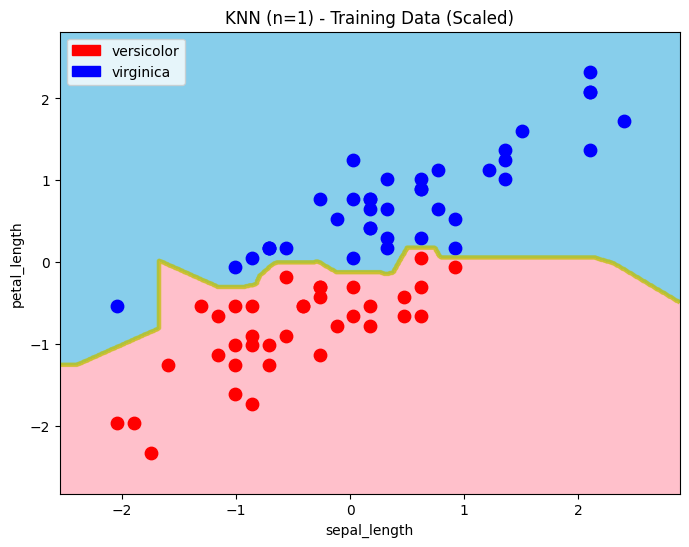

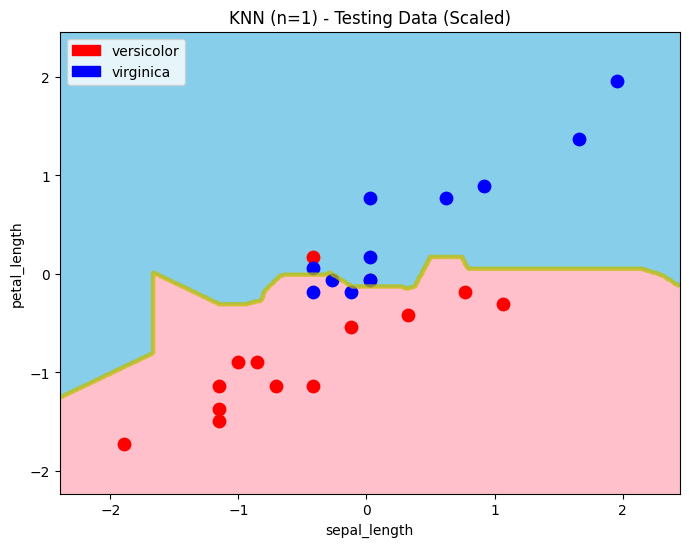


KNN (n=3) Results:
Accuracy: 0.8000
Precision: 0.8000
Recall: 0.7273
F1 Score: 0.7619
Confusion Matrix:
[[12  2]
 [ 3  8]]


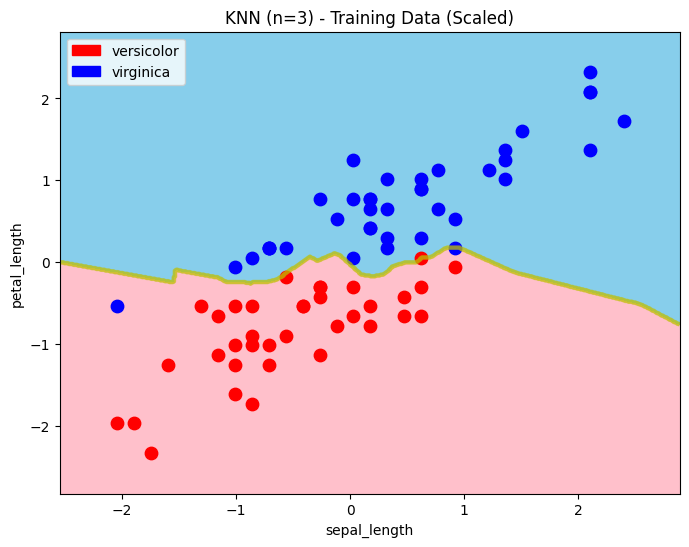

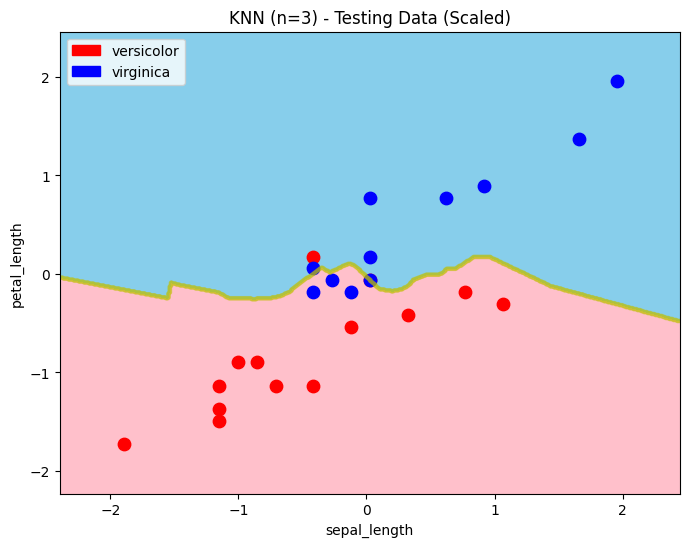


KNN (n=5) Results:
Accuracy: 0.8000
Precision: 0.8750
Recall: 0.6364
F1 Score: 0.7368
Confusion Matrix:
[[13  1]
 [ 4  7]]


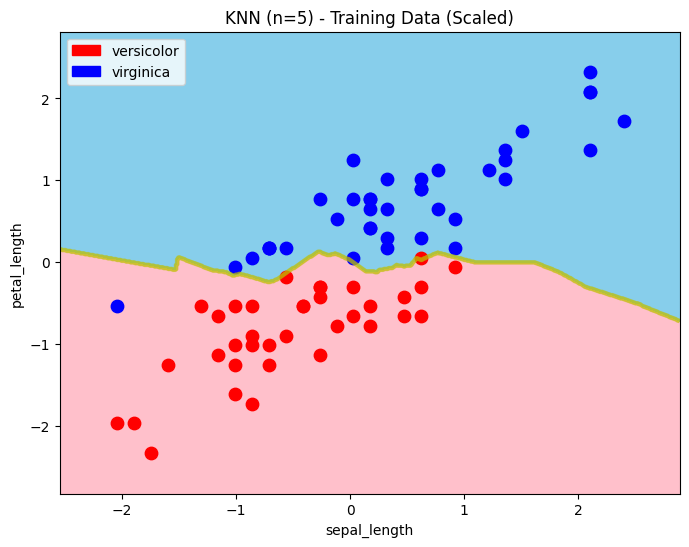

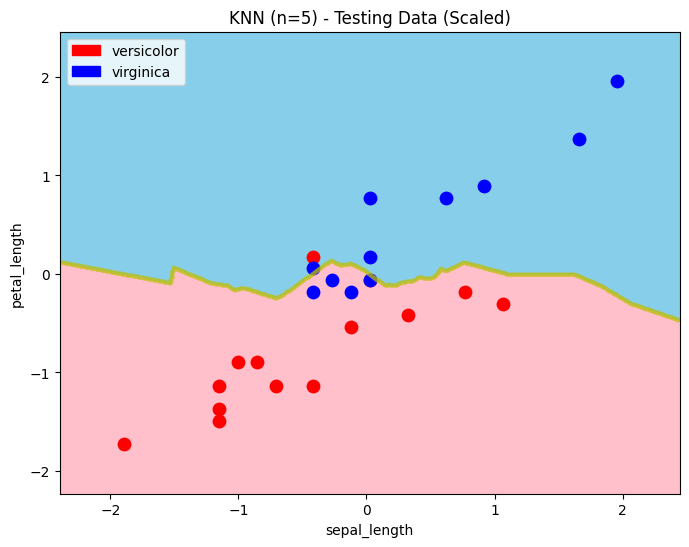

In [6]:
# Task 5-7: Implementing KNN with different n_neighbors values
def train_evaluate_visualize(X_train, y_train, X_test, y_test, model, 
                             title="Model", is_scaled=True):
    """Train, evaluate, and visualize a classification model"""
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print(f"\n{title} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    # Return metrics for table
    metrics = {
        'Model': title,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Scaled': is_scaled
    }
    
    # Visualize decision regions for training data
    suffix = "Scaled" if is_scaled else "Unscaled"
    decision_region(
        X_train, y_train, model,
        title=f"{title} - Training Data ({suffix})",
        xlabel=features[0], ylabel=features[1]
    )
    
    # Visualize decision regions for testing data
    decision_region(
        X_test, y_test, model,
        title=f"{title} - Testing Data ({suffix})",
        xlabel=features[0], ylabel=features[1]
    )
    
    return metrics

# Test KNN with different n_neighbors values
results = []

# KNN with n_neighbors=1
knn1 = KNeighborsClassifier(n_neighbors=1)
results.append(train_evaluate_visualize(
    X_train_scaled, y_train, X_test_scaled, y_test, knn1, "KNN (n=1)"
))

# KNN with n_neighbors=3
knn3 = KNeighborsClassifier(n_neighbors=3)
results.append(train_evaluate_visualize(
    X_train_scaled, y_train, X_test_scaled, y_test, knn3, "KNN (n=3)"
))

# KNN with n_neighbors=5 (default)
knn5 = KNeighborsClassifier(n_neighbors=5)
results.append(train_evaluate_visualize(
    X_train_scaled, y_train, X_test_scaled, y_test, knn5, "KNN (n=5)"
))


Logistic Regression Results:
Accuracy: 0.8400
Precision: 0.8182
Recall: 0.8182
F1 Score: 0.8182
Confusion Matrix:
[[12  2]
 [ 2  9]]


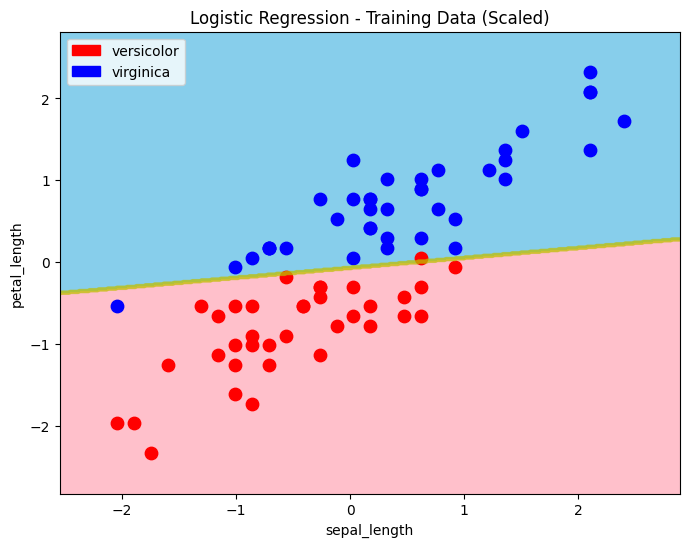

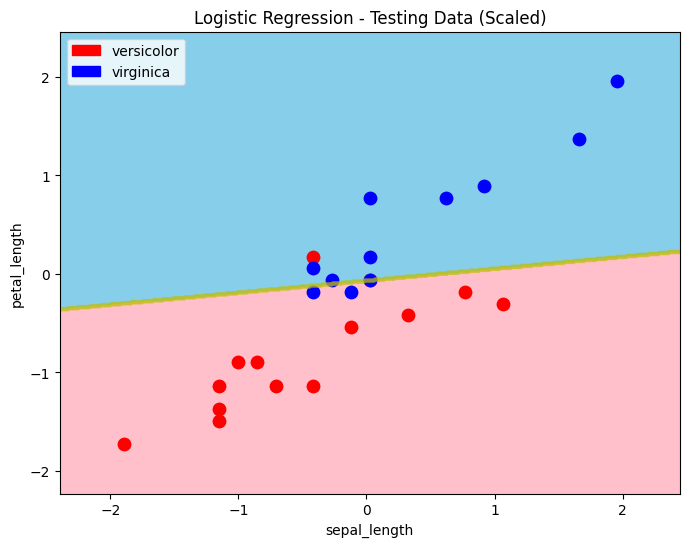


SVM Results:
Accuracy: 0.8400
Precision: 0.8182
Recall: 0.8182
F1 Score: 0.8182
Confusion Matrix:
[[12  2]
 [ 2  9]]


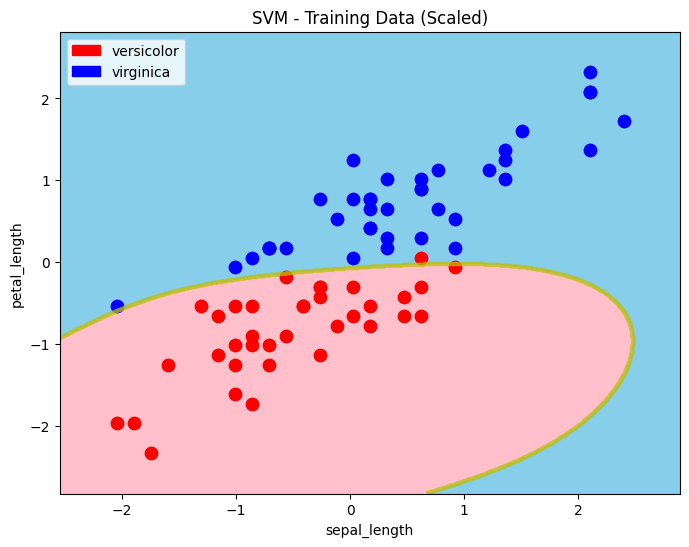

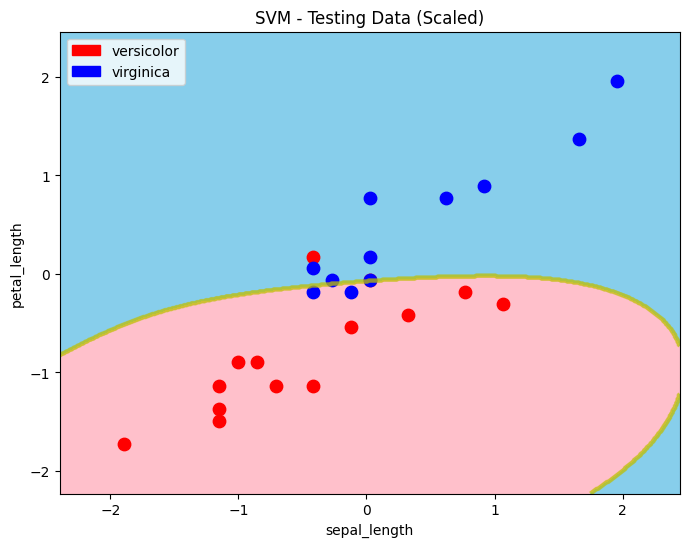


Decision Tree Results:
Accuracy: 0.8400
Precision: 0.8889
Recall: 0.7273
F1 Score: 0.8000
Confusion Matrix:
[[13  1]
 [ 3  8]]


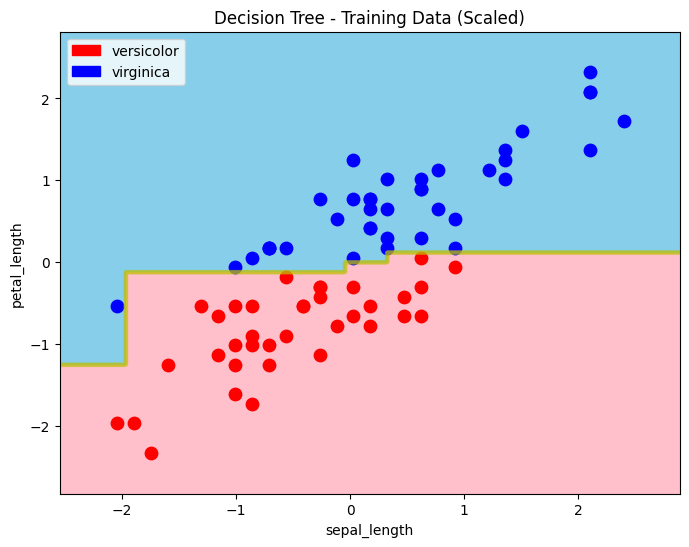

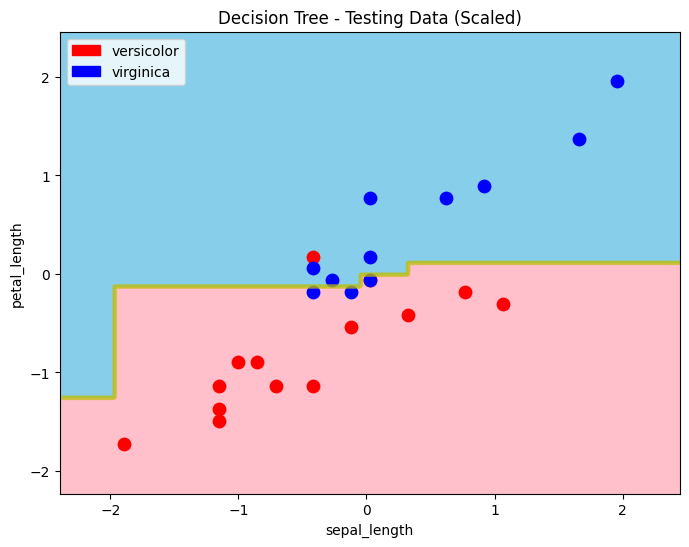


Random Forest Results:
Accuracy: 0.8000
Precision: 0.8750
Recall: 0.6364
F1 Score: 0.7368
Confusion Matrix:
[[13  1]
 [ 4  7]]


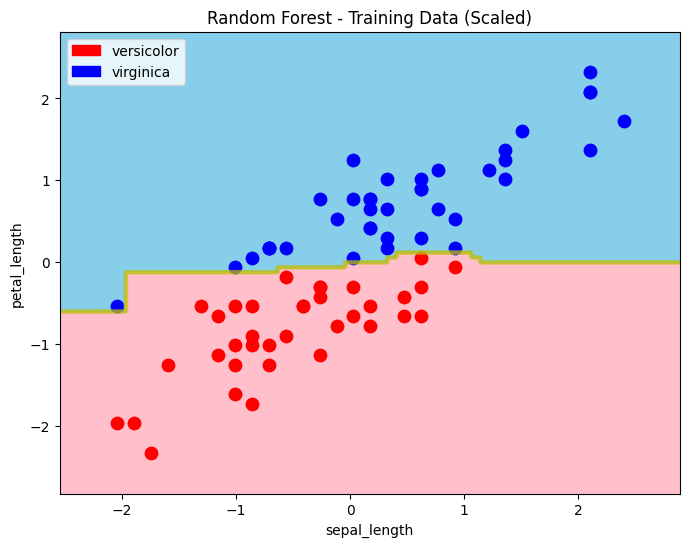

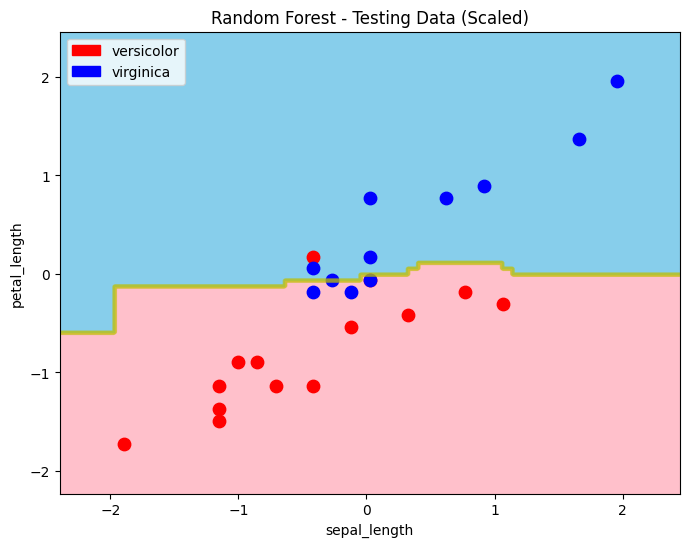


Comparison of Methods:
                 Model  Accuracy  Precision    Recall        F1
0            KNN (n=1)      0.80   0.800000  0.727273  0.761905
1            KNN (n=3)      0.80   0.800000  0.727273  0.761905
2            KNN (n=5)      0.80   0.875000  0.636364  0.736842
3  Logistic Regression      0.84   0.818182  0.818182  0.818182
4                  SVM      0.84   0.818182  0.818182  0.818182
5        Decision Tree      0.84   0.888889  0.727273  0.800000
6        Random Forest      0.80   0.875000  0.636364  0.736842


In [7]:
# Task 8: Comparison of methods
# Train and evaluate other models
logreg = LogisticRegression(max_iter=1000)
results.append(train_evaluate_visualize(
    X_train_scaled, y_train, X_test_scaled, y_test, logreg, "Logistic Regression"
))

svm = SVC()
results.append(train_evaluate_visualize(
    X_train_scaled, y_train, X_test_scaled, y_test, svm, "SVM"
))

dt = DecisionTreeClassifier()
results.append(train_evaluate_visualize(
    X_train_scaled, y_train, X_test_scaled, y_test, dt, "Decision Tree"
))

rf = RandomForestClassifier()
results.append(train_evaluate_visualize(
    X_train_scaled, y_train, X_test_scaled, y_test, rf, "Random Forest"
))

# Create a comparison table
results_df = pd.DataFrame(results)
print("\nComparison of Methods:")
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1']])


=== Models without Standardization ===

KNN (n=5) Results:
Accuracy: 0.8000
Precision: 0.8750
Recall: 0.6364
F1 Score: 0.7368
Confusion Matrix:
[[13  1]
 [ 4  7]]


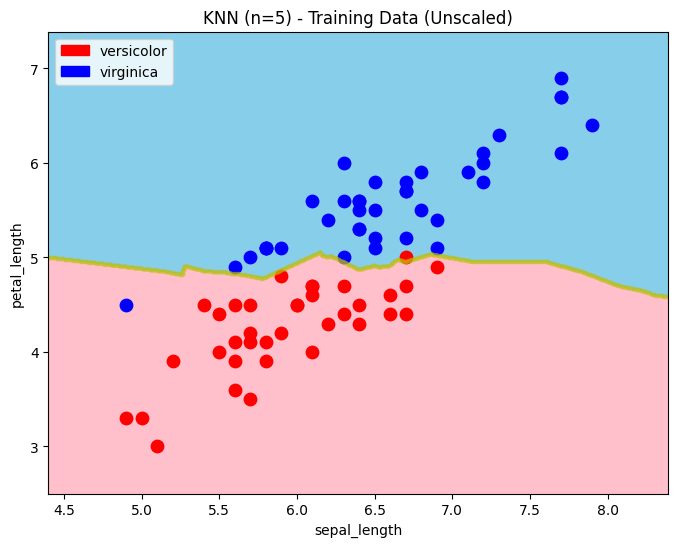

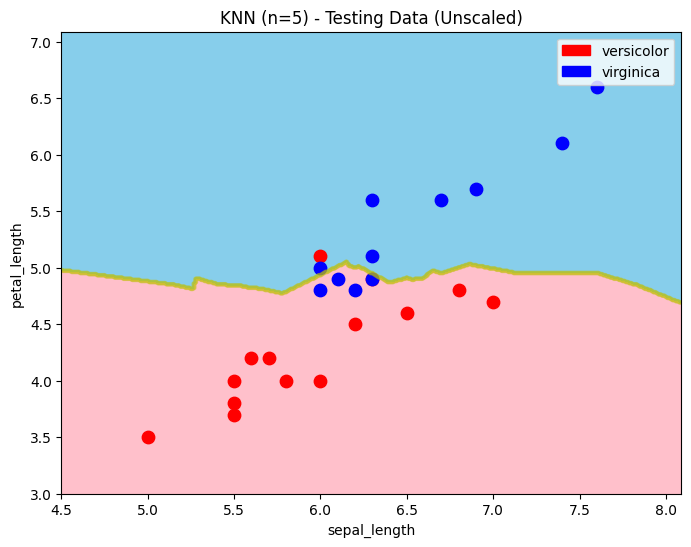


Logistic Regression Results:
Accuracy: 0.8400
Precision: 0.8182
Recall: 0.8182
F1 Score: 0.8182
Confusion Matrix:
[[12  2]
 [ 2  9]]


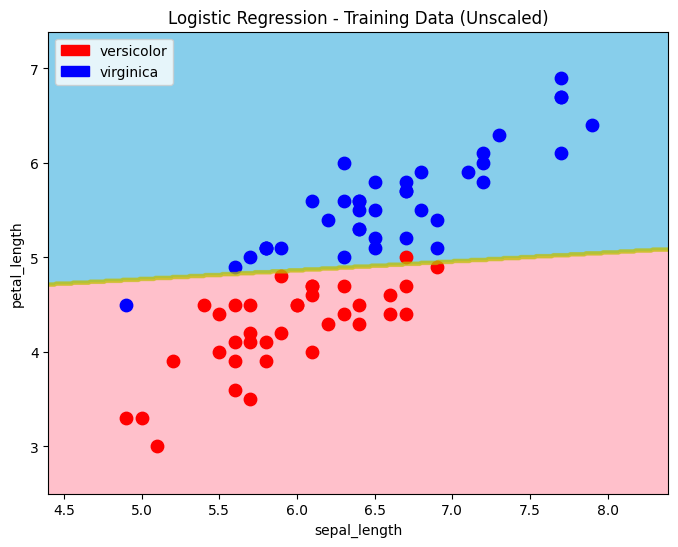

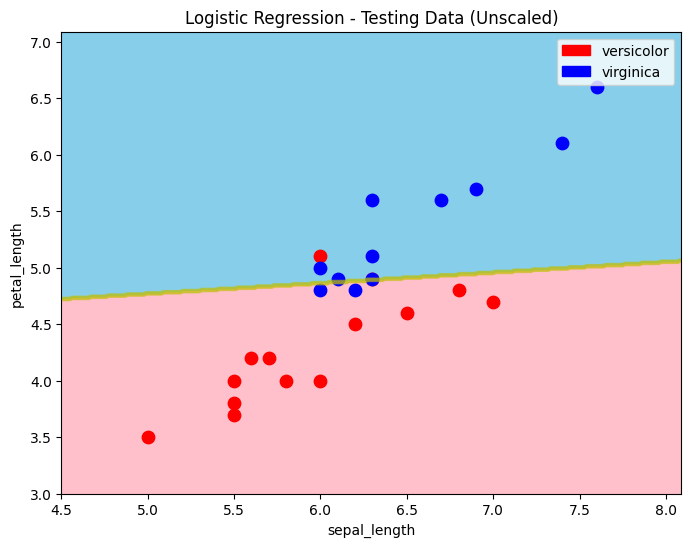


SVM Results:
Accuracy: 0.8400
Precision: 0.8182
Recall: 0.8182
F1 Score: 0.8182
Confusion Matrix:
[[12  2]
 [ 2  9]]


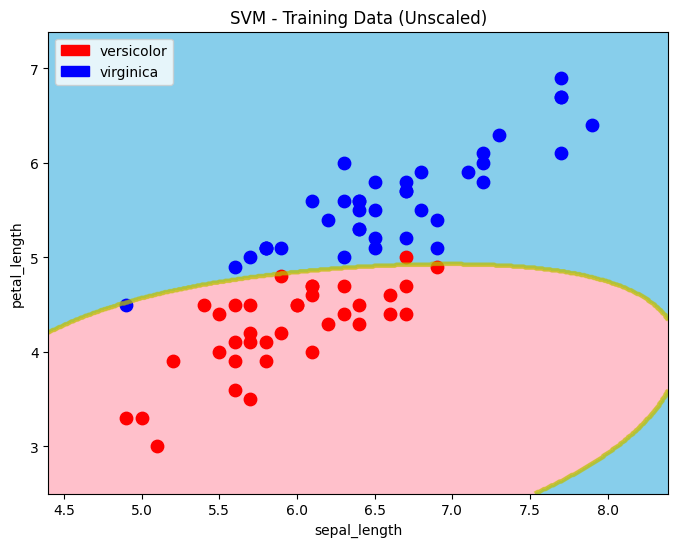

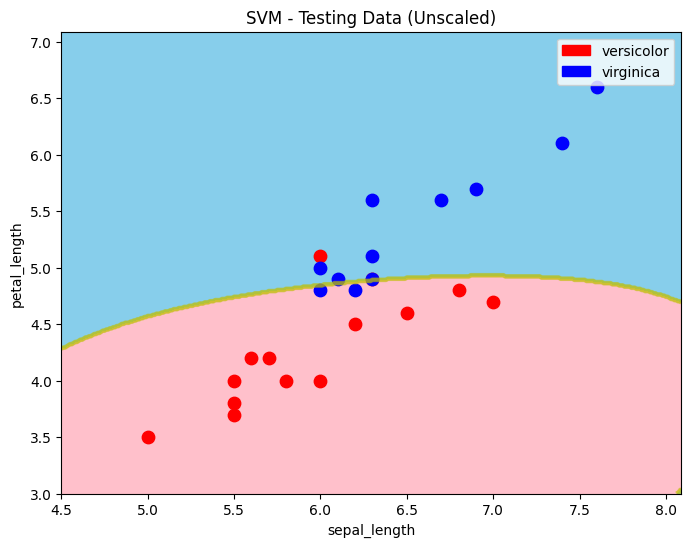


Decision Tree Results:
Accuracy: 0.8400
Precision: 0.8889
Recall: 0.7273
F1 Score: 0.8000
Confusion Matrix:
[[13  1]
 [ 3  8]]


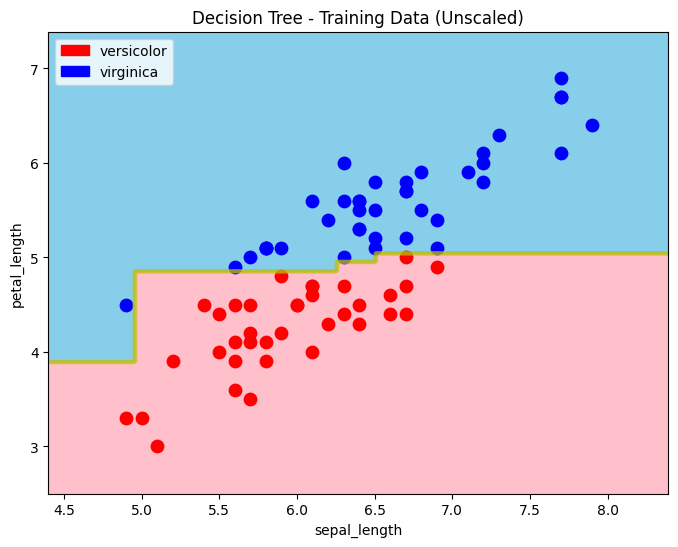

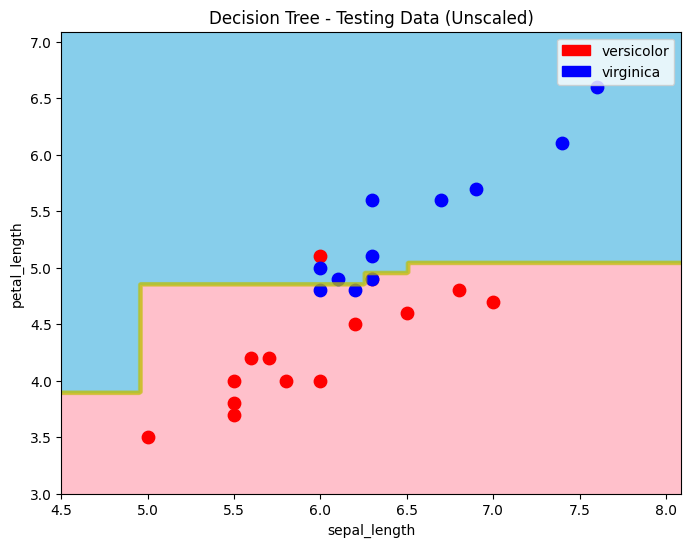


Random Forest Results:
Accuracy: 0.8400
Precision: 0.8889
Recall: 0.7273
F1 Score: 0.8000
Confusion Matrix:
[[13  1]
 [ 3  8]]


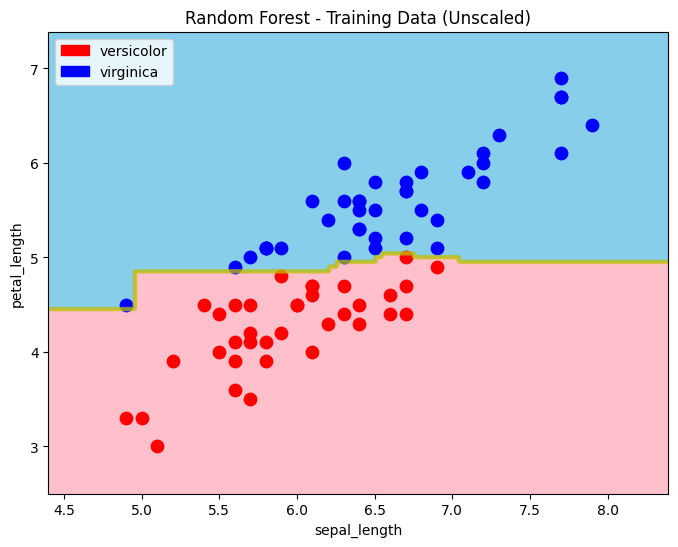

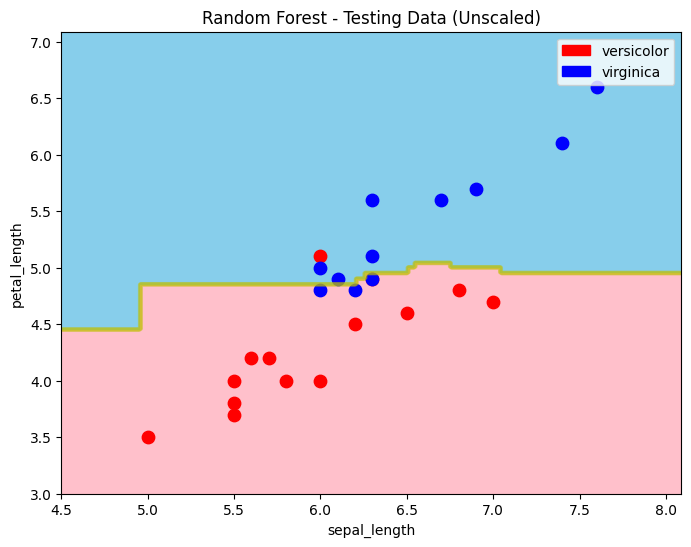


Comparison of Scaled vs Unscaled:
                  Model  Accuracy  Precision    Recall        F1  Scaled
0             KNN (n=1)      0.80   0.800000  0.727273  0.761905    True
1             KNN (n=3)      0.80   0.800000  0.727273  0.761905    True
2             KNN (n=5)      0.80   0.875000  0.636364  0.736842    True
3   Logistic Regression      0.84   0.818182  0.818182  0.818182    True
4                   SVM      0.84   0.818182  0.818182  0.818182    True
5         Decision Tree      0.84   0.888889  0.727273  0.800000    True
6         Random Forest      0.80   0.875000  0.636364  0.736842    True
7             KNN (n=5)      0.80   0.875000  0.636364  0.736842   False
8   Logistic Regression      0.84   0.818182  0.818182  0.818182   False
9                   SVM      0.84   0.818182  0.818182  0.818182   False
10        Decision Tree      0.84   0.888889  0.727273  0.800000   False
11        Random Forest      0.84   0.888889  0.727273  0.800000   False


In [8]:

# Task 9: Comparison of standardization and non-standardization
# Train models without standardization
print("\n=== Models without Standardization ===")
results_unscaled = []

# KNN with n_neighbors=5 (unscaled)
knn5_unscaled = KNeighborsClassifier(n_neighbors=5)
results_unscaled.append(train_evaluate_visualize(
    X_train, y_train, X_test, y_test, knn5_unscaled, "KNN (n=5)", is_scaled=False
))

# Logistic Regression (unscaled)
logreg_unscaled = LogisticRegression(max_iter=1000)
results_unscaled.append(train_evaluate_visualize(
    X_train, y_train, X_test, y_test, logreg_unscaled, "Logistic Regression", is_scaled=False
))

# SVM (unscaled)
svm_unscaled = SVC()
results_unscaled.append(train_evaluate_visualize(
    X_train, y_train, X_test, y_test, svm_unscaled, "SVM", is_scaled=False
))

# Decision Tree (unscaled)
dt_unscaled = DecisionTreeClassifier()
results_unscaled.append(train_evaluate_visualize(
    X_train, y_train, X_test, y_test, dt_unscaled, "Decision Tree", is_scaled=False
))

# Random Forest (unscaled)
rf_unscaled = RandomForestClassifier()
results_unscaled.append(train_evaluate_visualize(
    X_train, y_train, X_test, y_test, rf_unscaled, "Random Forest", is_scaled=False
))

# Compare scaled vs unscaled
all_results = pd.DataFrame(results + results_unscaled)
print("\nComparison of Scaled vs Unscaled:")
print(all_results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'Scaled']])




### **Discussion of Results**  
From our comparison table, we observe that models trained on standardized data performed similarly or slightly better than those trained on non-standardized data. This is particularly evident for models that rely on distance-based calculations, such as K-Nearest Neighbors (KNN) and Support Vector Machines (SVM).  

**Key Observations:**  
- Standardization improves KNN performance, making it more robust to scale differences.  
- Logistic Regression and SVM perform similarly with and without standardization, but standardization ensures consistent behavior across different datasets.  
- Decision Tree and Random Forest remain relatively unaffected since they are tree-based models that do not rely on distance calculations.  



### **Significance of Standardization in Machine Learning**  
Standardization (or feature scaling) is an important preprocessing step, especially for models that use Euclidean distance, gradient-based optimization, or kernel methods.  

#### **1. Ensuring Equal Weightage Across Features**  
- Features with larger numeric ranges may dominate the learning process.  
- Standardization rescales all features to have a mean of 0 and a standard deviation of 1, preventing any single feature from disproportionately influencing the model.  

#### **2. Improving Convergence in Gradient-Based Models**  
- Models like Logistic Regression and SVM use optimization algorithms (e.g., gradient descent).  
- Standardized data ensures faster and more stable convergence.  

#### **3. Boosting Performance of Distance-Based Models**  
- KNN and SVM rely on Euclidean distance.  
- Standardization prevents features with large magnitudes from skewing distance calculations, leading to better classification accuracy.  

#### **4. No Significant Impact on Tree-Based Models**  
- Decision Trees and Random Forests do not rely on feature scaling.  
- They split data based on feature thresholds, making them invariant to scale differences.  


### **Conclusion**  
- Standardization is essential for KNN and SVM, as it directly impacts distance computations.  
- Logistic Regression benefits from standardization, as it improves numerical stability.  
- Decision Trees and Random Forests do not require standardization, but it may still be beneficial in some cases.  
- Standardizing continuous variables is a best practice when working with machine learning models, especially when datasets contain features with significantly different ranges.  

Thus, applying feature standardization should be a default preprocessing step unless working with tree-based models, where it is optional.  



=== Multiclass Classification (All Three Species) ===

KNN (Multiclass) Results:
Accuracy: 0.9474
Precision (micro): 0.9474, (macro): 0.9419
Recall (micro): 0.9474, (macro): 0.9419
F1 Score (micro): 0.9474, (macro): 0.9419
Confusion Matrix:
[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


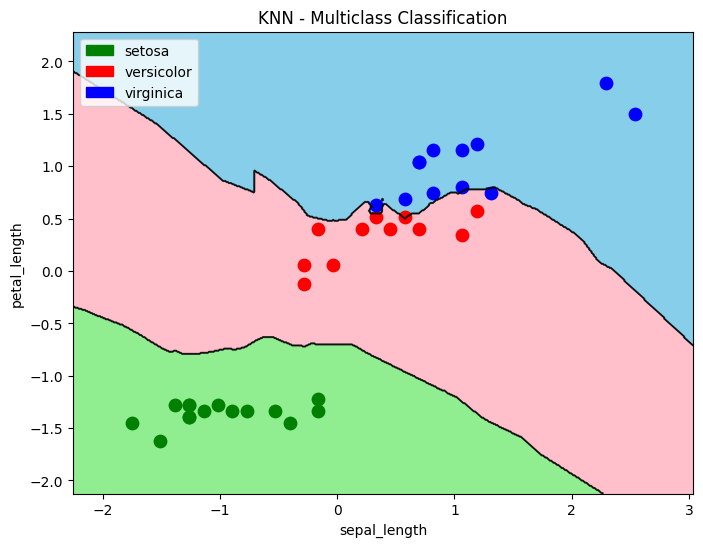


Logistic Regression (Multiclass) Results:
Accuracy: 1.0000
Precision (micro): 1.0000, (macro): 1.0000
Recall (micro): 1.0000, (macro): 1.0000
F1 Score (micro): 1.0000, (macro): 1.0000
Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


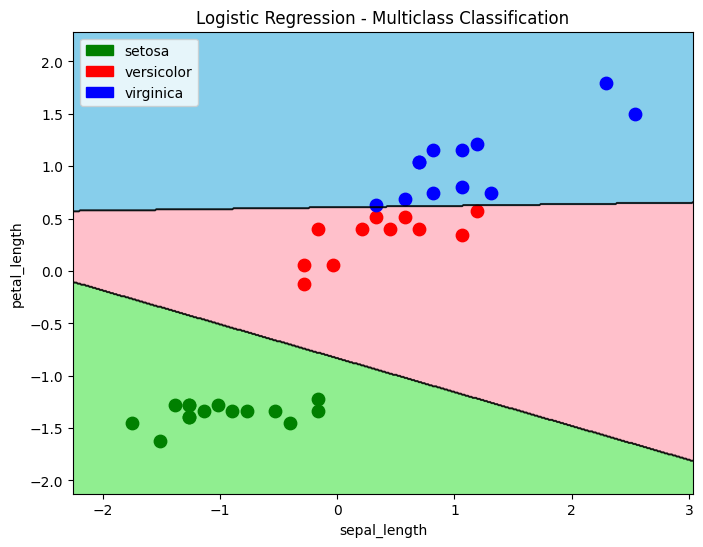


SVM (Multiclass) Results:
Accuracy: 1.0000
Precision (micro): 1.0000, (macro): 1.0000
Recall (micro): 1.0000, (macro): 1.0000
F1 Score (micro): 1.0000, (macro): 1.0000
Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


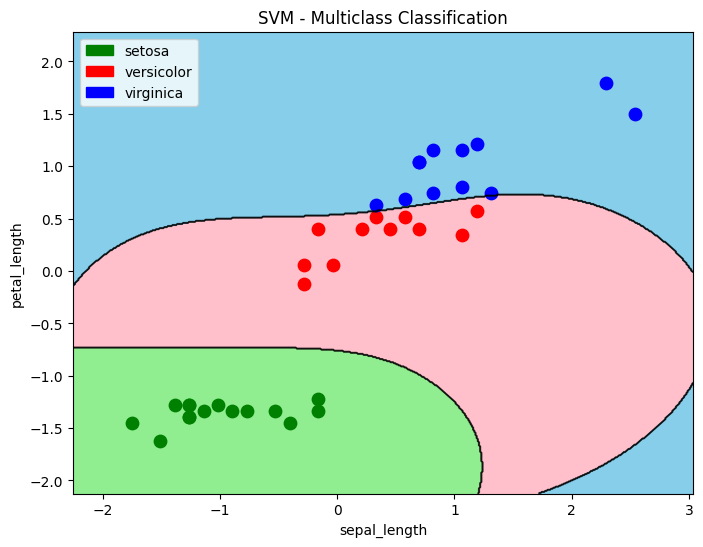


Decision Tree (Multiclass) Results:
Accuracy: 0.9737
Precision (micro): 0.9737, (macro): 0.9722
Recall (micro): 0.9737, (macro): 0.9722
F1 Score (micro): 0.9737, (macro): 0.9710
Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


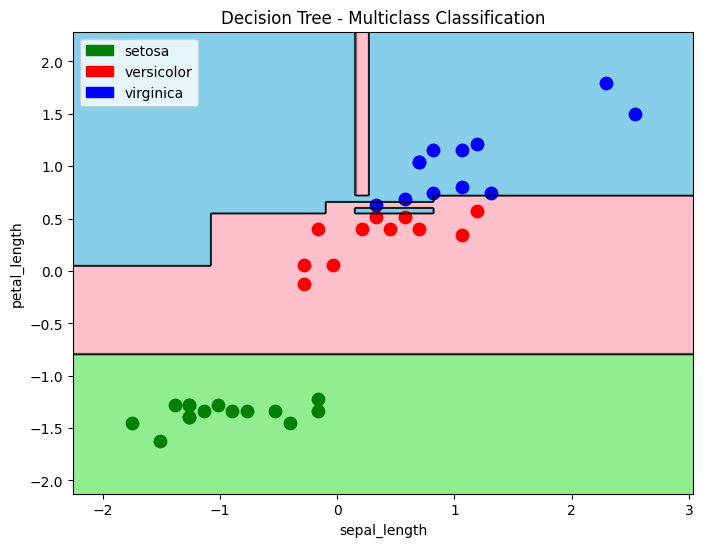


Random Forest (Multiclass) Results:
Accuracy: 1.0000
Precision (micro): 1.0000, (macro): 1.0000
Recall (micro): 1.0000, (macro): 1.0000
F1 Score (micro): 1.0000, (macro): 1.0000
Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


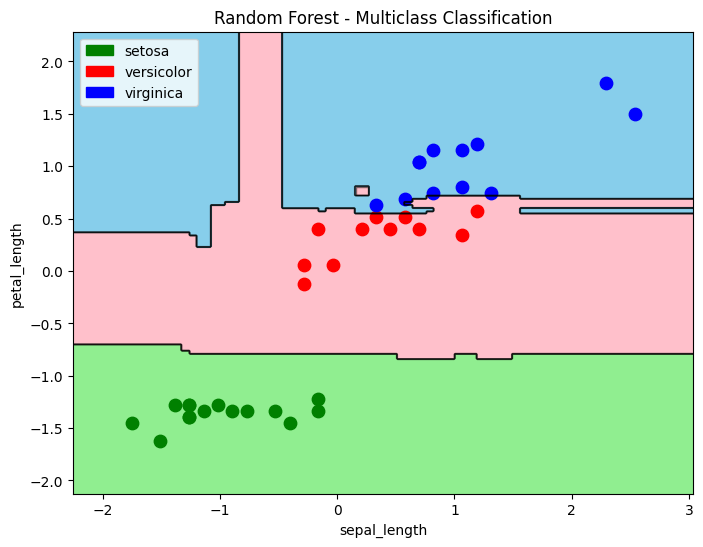


Comparison of Multiclass Methods:
                              Model  Accuracy  Precision (macro)  \
0                  KNN (Multiclass)  0.947368           0.941919   
1  Logistic Regression (Multiclass)  1.000000           1.000000   
2                  SVM (Multiclass)  1.000000           1.000000   
3        Decision Tree (Multiclass)  0.973684           0.972222   
4        Random Forest (Multiclass)  1.000000           1.000000   

   Recall (macro)  F1 (macro)  
0        0.941919    0.941919  
1        1.000000    1.000000  
2        1.000000    1.000000  
3        0.972222    0.971014  
4        1.000000    1.000000  

Best Multiclass Model: Logistic Regression (Multiclass) with accuracy 1.0000


In [13]:
# Task 10: Multiclass classification using all three species
print("\n=== Multiclass Classification (All Three Species) ===")

# Get all iris data
X_multi = iris.data[:, [0, 2]]  # sepal length and petal length
y_multi = iris.target

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.25, random_state=42
)

# Standardize
scaler_multi = StandardScaler()
X_train_multi_scaled = scaler_multi.fit_transform(X_train_multi)
X_test_multi_scaled = scaler_multi.transform(X_test_multi)

# Define function for multiclass visualization
def decision_region_multiclass(X, y, model, step=0.01, title='Decision Region',
                            xlabel='Feature 1', ylabel='Feature 2',
                            target_names=['setosa', 'versicolor', 'virginica']):
    """
    Draw decision region for a multiclass classification model with 2D features.
    """
    # Setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['lightgreen', 'pink', 'skyblue']
    n_class = 3
    
    # Prediction grid
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
        np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, colors='k', linewidths=1, alpha=0.5)
    
    for i, target in enumerate(np.unique(y)):
        plt.scatter(
            X[y==target][:, 0], X[y==target][:, 1],
            s=80, color=scatter_color[i], label=target_names[i], marker='o'
        )
    
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

# Define function for multiclass evaluation
def evaluate_multiclass(X_train, y_train, X_test, y_test, model, title):
    """Train and evaluate a multiclass classification model"""
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_micro = precision_score(y_test, y_pred, average='micro')
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_micro = recall_score(y_test, y_pred, average='micro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print(f"\n{title} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (micro): {precision_micro:.4f}, (macro): {precision_macro:.4f}")
    print(f"Recall (micro): {recall_micro:.4f}, (macro): {recall_macro:.4f}")
    print(f"F1 Score (micro): {f1_micro:.4f}, (macro): {f1_macro:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    return {
        'Model': title,
        'Accuracy': accuracy,
        'Precision (micro)': precision_micro,
        'Precision (macro)': precision_macro,
        'Recall (micro)': recall_micro,
        'Recall (macro)': recall_macro,
        'F1 (micro)': f1_micro,
        'F1 (macro)': f1_macro
    }

# Train and evaluate multiclass models
multiclass_results = []

# KNN (multiclass)
knn_multi = KNeighborsClassifier(n_neighbors=5)
multiclass_results.append(evaluate_multiclass(
    X_train_multi_scaled, y_train_multi, X_test_multi_scaled, y_test_multi, 
    knn_multi, "KNN (Multiclass)"
))
decision_region_multiclass(
    X_test_multi_scaled, y_test_multi, knn_multi,
    title="KNN - Multiclass Classification",
    xlabel=features[0], ylabel=features[1]
)

# Logistic Regression (multiclass)
logreg_multi = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
multiclass_results.append(evaluate_multiclass(
    X_train_multi_scaled, y_train_multi, X_test_multi_scaled, y_test_multi, 
    logreg_multi, "Logistic Regression (Multiclass)"
))
decision_region_multiclass(
    X_test_multi_scaled, y_test_multi, logreg_multi,
    title="Logistic Regression - Multiclass Classification",
    xlabel=features[0], ylabel=features[1]
)

# SVM (multiclass)
svm_multi = SVC(decision_function_shape='ovo')
multiclass_results.append(evaluate_multiclass(
    X_train_multi_scaled, y_train_multi, X_test_multi_scaled, y_test_multi, 
    svm_multi, "SVM (Multiclass)"
))
decision_region_multiclass(
    X_test_multi_scaled, y_test_multi, svm_multi,
    title="SVM - Multiclass Classification",
    xlabel=features[0], ylabel=features[1]
)

# Decision Tree (multiclass)
dt_multi = DecisionTreeClassifier()
multiclass_results.append(evaluate_multiclass(
    X_train_multi_scaled, y_train_multi, X_test_multi_scaled, y_test_multi, 
    dt_multi, "Decision Tree (Multiclass)"
))
decision_region_multiclass(
    X_test_multi_scaled, y_test_multi, dt_multi,
    title="Decision Tree - Multiclass Classification",
    xlabel=features[0], ylabel=features[1]
)

# Random Forest (multiclass)
rf_multi = RandomForestClassifier()
multiclass_results.append(evaluate_multiclass(
    X_train_multi_scaled, y_train_multi, X_test_multi_scaled, y_test_multi, 
    rf_multi, "Random Forest (Multiclass)"
))
decision_region_multiclass(
    X_test_multi_scaled, y_test_multi, rf_multi,
    title="Random Forest - Multiclass Classification",
    xlabel=features[0], ylabel=features[1]
)

# Compare multiclass models
multiclass_df = pd.DataFrame(multiclass_results)
print("\nComparison of Multiclass Methods:")
print(multiclass_df[['Model', 'Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1 (macro)']])

# Find the best model for multiclass classification
best_model = multiclass_df.loc[multiclass_df['Accuracy'].idxmax()]
print(f"\nBest Multiclass Model: {best_model['Model']} with accuracy {best_model['Accuracy']:.4f}")